In [1]:
#ファイルの読み込み
import pandas as pd
df1 = pd.read_csv('data_jun.csv')
df1.head()

,year,futoko_rate_jun,stu_per_tch_jun,classes_jun,rate_jun,rate_OII_jun,rate_Lve_jun
0,1991,1.04,18.08,3150,4.2,0.004,1.33
1,1992,1.16,17.81,3150,5.0,0.004,1.39
2,1993,1.24,17.43,3150,6.0,0.006,1.40
3,1994,1.32,17.11,3150,8.0,0.004,1.37
4,1995,1.42,16.86,3150,8.8,0.004,1.37


In [2]:
#欠損値の確認
df1.isnull().sum()

year               0
futoko_rate_jun    0
stu_per_tch_jun    0
classes_jun        0
rate_jun           0
rate_OII_jun       0
rate_Lve_jun       0
dtype: int64

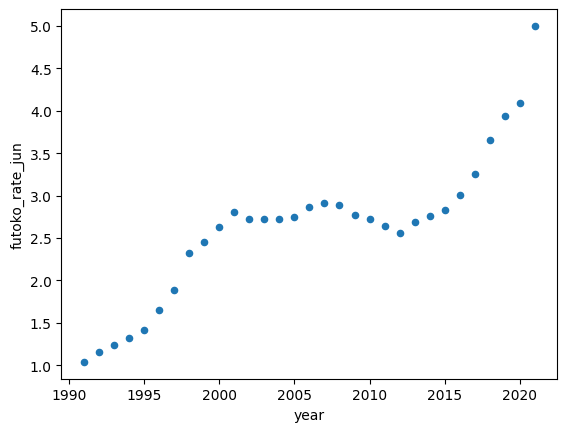

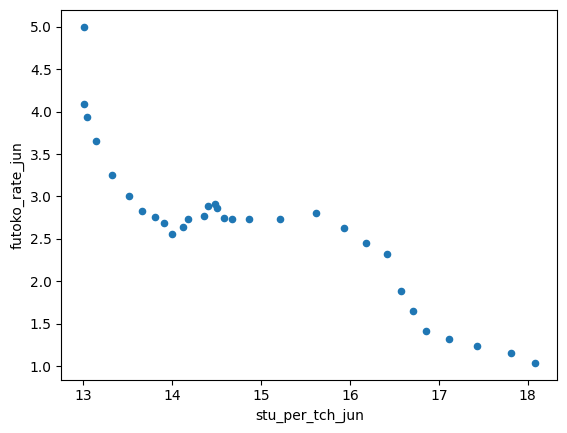

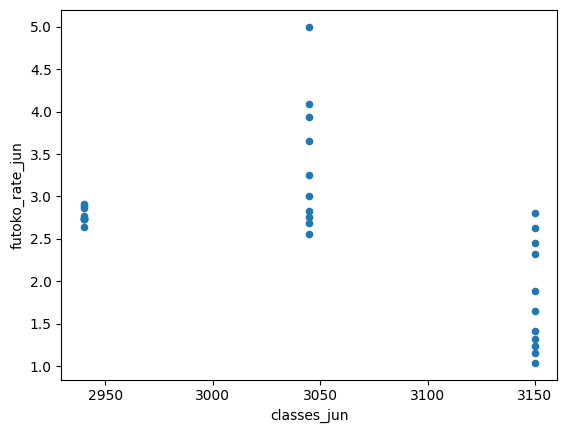

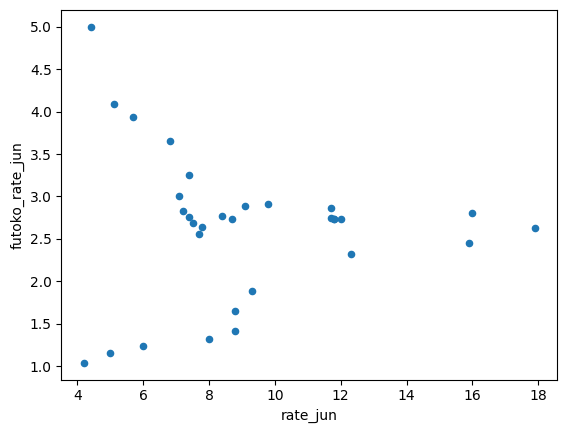

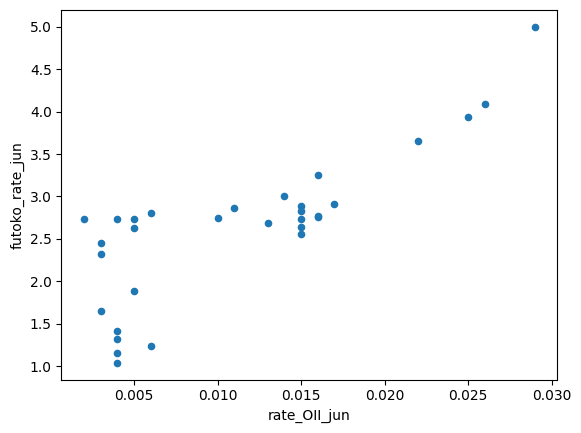

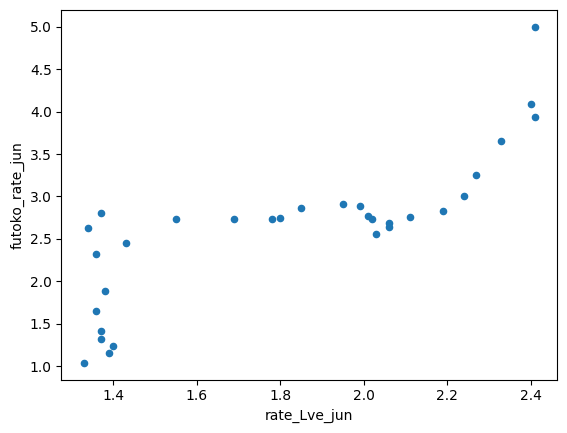

In [3]:
#散布図で相関を見てみる
for i in df1.columns:
    if i == 'futoko_rate_jun':
        continue
    df1.plot(kind = 'scatter', x = i, y = 'futoko_rate_jun')

In [4]:
#特徴量から'year'を削除
df2 = df1.drop(['year'], axis = 1)

#標準化する
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df2)
sc_df1 = sc.transform(df2)
sc_df1 = pd.DataFrame(sc_df1, columns = df2.columns)
sc_df1.head()

,futoko_rate_jun,stu_per_tch_jun,classes_jun,rate_jun,rate_OII_jun,rate_Lve_jun
0,-1.849284,2.060682,1.176697,-1.459897,-0.962980,-1.275417
1,-1.709489,1.880885,1.176697,-1.220285,-0.962980,-1.117476
2,-1.616292,1.627837,1.176697,-0.920769,-0.696441,-1.091153
3,-1.523095,1.414745,1.176697,-0.321738,-0.962980,-1.170123
4,-1.406598,1.248266,1.176697,-0.082125,-0.962980,-1.170123


In [11]:
#相関行列を出して見る
sc_df1.corr()

,futoko_rate_jun,stu_per_tch_jun,classes_jun,rate_jun,rate_OII_jun,rate_Lve_jun
futoko_rate_jun,1.000000,-0.890122,-0.476923,-0.059723,0.813922,0.812653
stu_per_tch_jun,-0.890122,1.000000,0.636384,0.180776,-0.832691,-0.942097
classes_jun,-0.476923,0.636384,1.000000,0.003828,-0.387998,-0.559045
rate_jun,-0.059723,0.180776,0.003828,1.000000,-0.520225,-0.475917
rate_OII_jun,0.813922,-0.832691,-0.387998,-0.520225,1.000000,0.923071
rate_Lve_jun,0.812653,-0.942097,-0.559045,-0.475917,0.923071,1.000000


In [7]:
#特徴量と正解データに分割
col = ['stu_per_tch_jun', 'rate_OII_jun', 'rate_Lve_jun', 'classes_jun', 'rate_jun']
x = sc_df1[col]
t = sc_df1['futoko_rate_jun']

In [8]:
#訓練データとテストデータの分割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,t, test_size = 0.2, random_state = 0)

#モデルを作成し学習させる
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train) 

LinearRegression()

In [9]:
#決定係数を出してみる
model.score(x_test, y_test)

0.9407447969099934